In [5]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import holidays
import pandas as pd
%matplotlib notebook

# Interpretazione dati
All'interno del file txt sono presenti dei campioni dei consumi elettrici di un edificio collocato in Olanda.
Ad essi non è associata alcuna data, di conseguenza non è possibile effettuare un'analisi accurata, ma è comunque possibile effettuare alcune considerazioni interessanti.

In [9]:
plt.rcParams["figure.figsize"] = (16,8)
with open('power_data_eamonn-1.txt', 'r') as f:
    x = f.readlines()
#x
x = np.array([int(i) for i in x if i != '\n'])
print(len(x), x)
DAY = 96

35040 [950 939 943 ... 627 633 882]


Il numero di campioni rilevati è pari 35040 che diviso per in numero di giorni in un anno(365) e per il numero di ore in un giorno(24) si ottiene il valore 4: si può ipotizzare che la frequenza campionaria è di 15 minuti e che quindi il numero di campioni giornalieri sia pari a 9. Plottando i dati è possibile verificare se effettivamente questa ipotesi possa essere valida.

Di seguito vengono effettuate le medie di ciascuna finestra da 96 campioni, ovvero i presunti consumi medi giornalieri e vengono plottati in sovrapposizione i campioni dei primi due ipotetici mesi e l'istogramma dei consumi giornalieri medi.
Imponendo che la larghezza di un blocco appartenente all'istogramma sia largo quanto la distanza tra 96 campioni si può verificare facilmente per via grafica che l'ipotesi fatta è perfettamente sensata.

In [10]:
x_day = np.mean(np.vstack([x[i*DAY:(i+1)*DAY] for i in range(len(x)//DAY)]), axis=1)
x_day.shape

(365,)

<IPython.core.display.Javascript object>


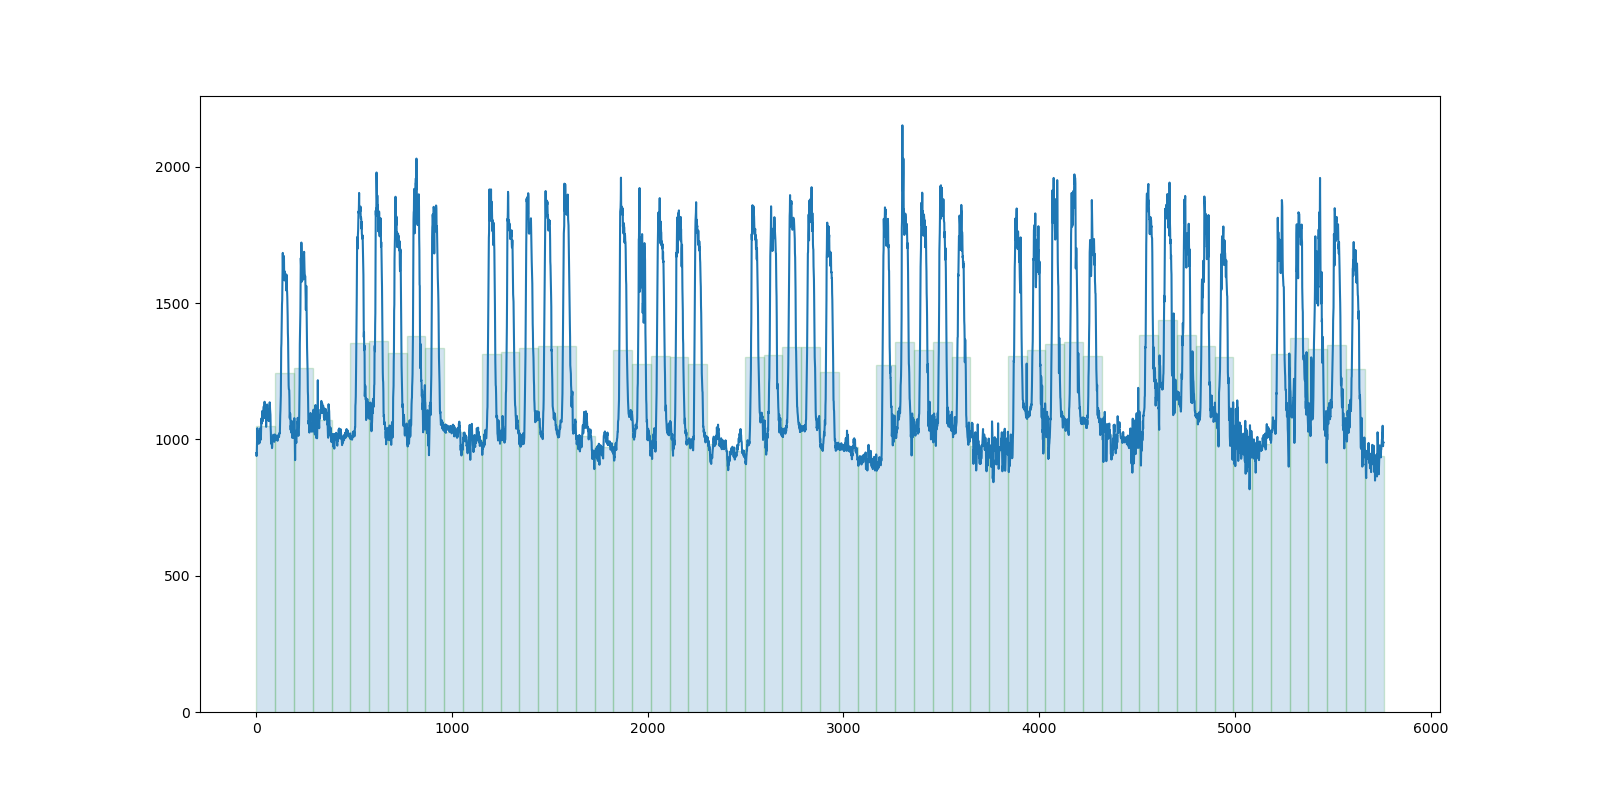

In [15]:
plt.close()
plt.plot(x[:DAY*60])
plt.bar(np.arange(0, DAY*60, DAY) + DAY/2, x_day[:60], width=DAY, alpha=0.2, edgecolor='C2')
plt.show()
# plt.savefig('a.svg')

Dalla morfologia del grafico è anche facile individuare quale giorno della settimana associare a ciascuna finestra da 96 campioni. Sovrapponendo al grafico dei campioni un istogramma rappresentante i giorni della settimana è possibile fare un'ulteriore verifica riguardo alla validità dell'ipotesi fatta in precedenza.

Di seguito, viene inoltre fornito un algoritmo molto semplice che riesce ad individuare con discreta precisione i possibili giorni che presentano anomalie: se la media dei consumi di un determinato giorno lavorativo/festivo si discosta di molto dai valori del giorno lavorativo/festivo a lui precedente, è possibile considerare la presenza di un anomalia dei consumi.

In [13]:
'''
prev = 0
for idx, (a, b) in enumerate(zip(x_day, x_day[1:])):
    if b - a > 200: # domenica
        print(idx, idx - prev)
        prev = idx
'''

dayweek = []
sday = []
for idx, a in enumerate(x_day):
    dayweek.append((idx+2) % 7)
    if idx > 14:
        avg = (x_day[idx-7] + x_day[idx-14]) * 0.5
        if (idx+2) % 7 < 5:
            # print('settimanale', x_day[idx])
            
            if x_day[idx] > avg * 1.1 or x_day[idx] < avg * 0.9:
                print(idx, dayweek[-1])
                sday.append(idx)
        else:
            # print('festivo', x_day[idx])
            if x_day[idx] > avg * 1.1 or x_day[idx] < avg * 0.9:
                # print(idx, dayweek[-1])
                # sday.append(idx)
                pass
dayweek = np.array(dayweek)
[b-a for a, b in zip(sday,sday[1:])]

86 4
89 0
96 0
100 4
103 0
119 2
124 0
126 2
127 3
131 0
133 2
134 3
138 0
141 3
145 0
152 0
357 2
358 3
359 4
363 1
364 2


[3, 7, 4, 3, 16, 5, 2, 1, 4, 2, 1, 4, 3, 4, 7, 205, 1, 1, 4, 1]

In [14]:
holidays_netherlands = holidays.CountryHoliday('Netherlands')

holi = []
YEAR = 2016
for d in pd.date_range(start=f'01-01-{YEAR}', end=f'31-12-{YEAR}', freq='1D'):
    if d in holidays_netherlands:
        print(d, holidays_netherlands.get(d), d.dayofyear+1)
        holi.append(d.dayofyear+1)
holi = np.array(holi)

2016-01-01 00:00:00 Nieuwjaarsdag 2
2016-03-25 00:00:00 Goede Vrijdag 86
2016-03-27 00:00:00 Eerste paasdag 88
2016-03-28 00:00:00 Tweede paasdag 89
2016-04-27 00:00:00 Koningsdag 119
2016-05-05 00:00:00 Hemelvaart 127
2016-05-15 00:00:00 Eerste Pinksterdag 137
2016-05-16 00:00:00 Tweede Pinksterdag 138
2016-12-25 00:00:00 Eerste Kerstdag 361
2016-12-26 00:00:00 Tweede Kerstdag 362


<IPython.core.display.Javascript object>


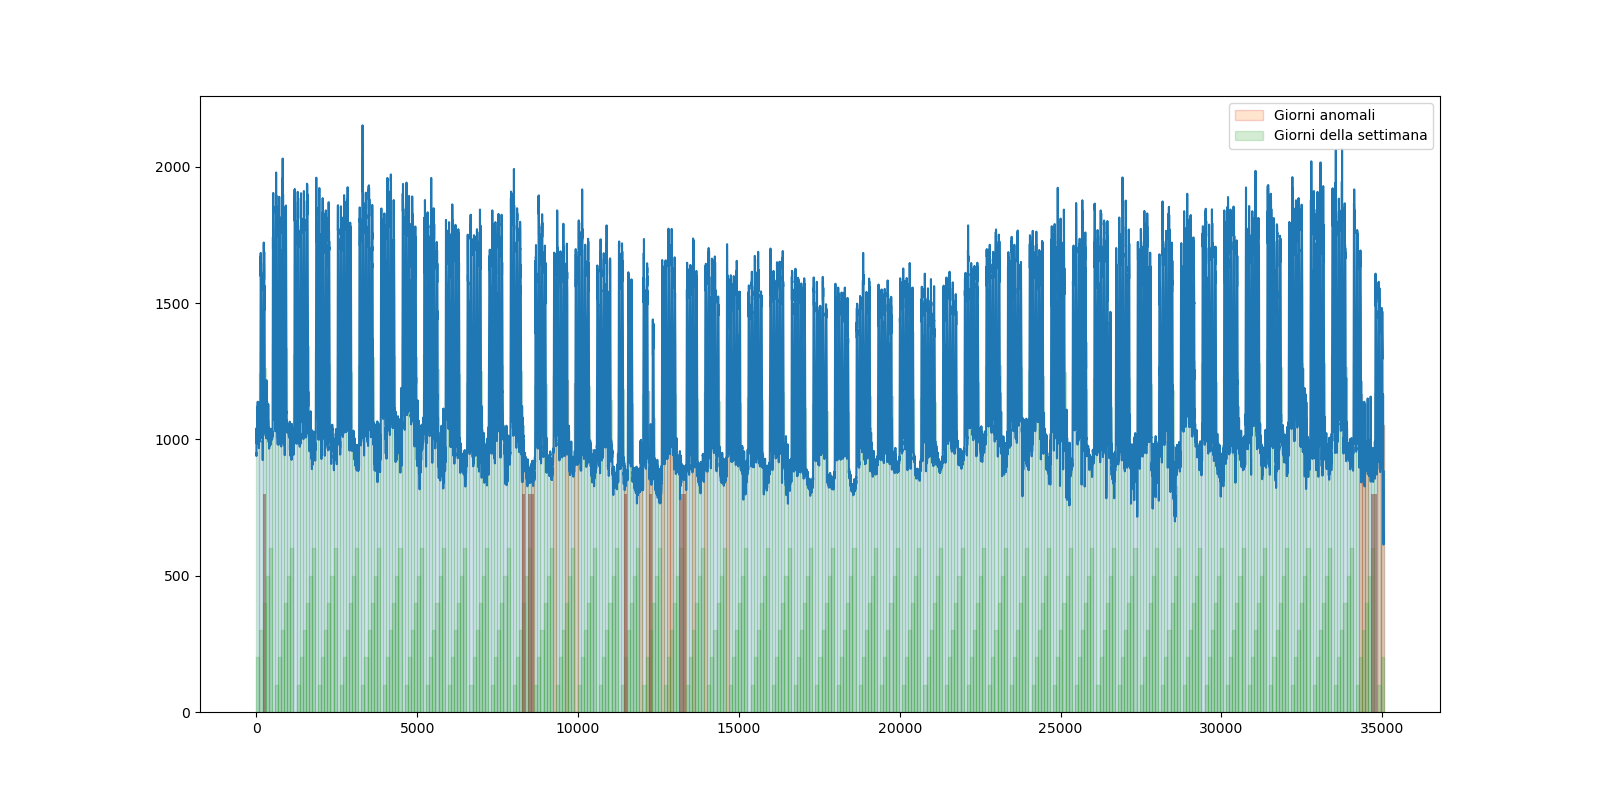

In [22]:
LIML = 0
LIMR = 365

plt.close()
tmp = np.array([a for a in sday if LIML < a < LIMR])
plt.plot(x[DAY*LIML:DAY*LIMR])
plt.bar(np.arange(0, DAY*(LIMR-LIML), DAY) + DAY/2, x_day[LIML:LIMR], width=DAY, alpha=0.2, edgecolor='C2')
plt.bar((tmp-LIML) * DAY + DAY/2, x_day[tmp], width=DAY, alpha=0.2, edgecolor='C3', label = "Giorni anomali")
plt.bar(np.arange(0, DAY*(LIMR-LIML), DAY) + DAY/2, 100 * dayweek[LIML:LIMR], width=DAY, alpha=0.2, edgecolor='C2', label = "Giorni della settimana")

plt.bar((holi-LIML) * DAY + DAY/2, 800, width=DAY, alpha=0.6, color='C5')

plt.legend()
plt.show()